# Assignement 2 : The Exploration-Exploitation Dilemma

## 1 - Stochastic Multi-Armed Bandits on Simulated Data

### 1.1 Bernoulli bandit models

In [80]:
# Imports 
import numpy as np 
import arms
from tqdm import tqdm
import matplotlib.pyplot as plt


In [81]:
# Defining our own Bernoulli bandit model with K arms of means p1, . . . , pK

# Random state
rs = np.random.randint(1, 312414)

arm1 = arms.ArmBernoulli(0.50, random_state=rs)
arm2 = arms.ArmBernoulli(0.35, random_state=rs)
arm3 = arms.ArmBernoulli(0.40, random_state=rs)
arm4 = arms.ArmBernoulli(0.55, random_state=rs)

MAB = [arm1, arm2, arm3, arm4]


In [82]:
def sampled_reward(arm):
    """Get reward 1 if the arm is a Bernoulli arm 
    and 0 if it isn't
    """
    if isinstance(arm, arms.ArmBernoulli):
        return int(arm.sample())
    else:
        return int(arms.ArmBernoulli(arm))
    

In [83]:
def UCB1(T, MAB, ro=0.25 ):
    """N : number of simulations
    ro : confidence interval parameter 
    """ 
    # nbrA : number of arms
    nbrA = len(MAB)
    # List of the obtained rewards 
    rew = []
    # List of drawn arms 
    draws = []
    # Sum of arms rewards
    sum_rew = [0] * nbrA
    # Number of times each arm has been drawn 
    n_draws = [0] * nbrA
    
    # Initialise first phase : Play each arm once
    for i in range(nbrA):
        reward = sampled_reward(MAB[i])
        n_draws[i] += 1
        sum_rew[i] += reward
        draws.append(i)
        rew.append(reward)
        
    # Other drawings until time T
    for t in range(nbrA, T):
        # optimistic scores of the arms at time t
        optimistic_scores = np.array([sum_rew[a]/n_draws[a] + ro*np.sqrt(np.log(t)/(2*n_draws[a])) 
                           for a in range(nbrA)])
        
        # Pull arm
        # Arm to draw is the arm with the highest score 
        index_arm_draw = np.argmax(optimistic_scores)
        
        reward = sampled_reward(MAB[index_arm_draw])
        n_draws[index_arm_draw] += 1
        sum_rew[index_arm_draw] += reward
        draws.append(index_arm_draw)
        rew.append(reward)
    return rew, draws        

In [84]:
def TS(T,MAB):
    """N : number of simulations
    ro : confidence interval parameter 
    """ 
    # nbrA : number of arms
    nbrA = len(MAB)
    # List of the obtained rewards 
    rew = []
    # List of drawn arms 
    draws = []
    # Sum of arms rewards
    sum_rew = [0] * nbrA
    # Number of times each arm has been drawn 
    n_draws = [0] * nbrA
    
    for t in range(T):
        # posterior distributions
        scores = [np.random.beta(sum_rew[a] + 1, n_draws[a] - sum_rew[a] + 1) 
                  for a in range(nbrA)]
        # Pull arm
        # Arm to draw is the arm with the highest score 
        index_arm_draw = np.argmax(scores)
        
        reward = sampled_reward(MAB[index_arm_draw])
        n_draws[index_arm_draw] += 1
        sum_rew[index_arm_draw] += reward
        draws.append(index_arm_draw)
        rew.append(reward)
    return rew, draws 

In [90]:
def NaiveStrat(T, MAB):
    # nbrA : number of arms
    nbrA = len(MAB)
    # List of the obtained rewards 
    rew = []
    # List of drawn arms 
    draws = []
    # Sum of arms rewards
    sum_rew = [0] * nbrA
    # Number of times each arm has been drawn 
    n_draws = [0] * nbrA
    
    # Initialise first phase : Play each arm once
    for i in range(nbrA):
        reward = sampled_reward(MAB[i])
        n_draws[i] += 1
        sum_rew[i] += reward
        draws.append(i)
        rew.append(reward)
        
    # Other drawings until time T
    for t in range(nbrA, T):
        # Empirical best arm 
        scores = np.array([sum_rew[a]/n_draws[a] for a in range(nbrA)])
        # Pull arm
        # Arm to draw is the arm with the highest score 
        index_arm_draw = np.argmax(scores)
        
        reward = sampled_reward(MAB[index_arm_draw])
        n_draws[index_arm_draw] += 1
        sum_rew[index_arm_draw] += reward
        draws.append(index_arm_draw)
        rew.append(reward)
    return rew, draws  

In [132]:
"""Simulating a bandit game of length T with the UCB1 and Thompson Sampling
strategy on the bandit model MAB: rew and draws are the sequence of the
T rewards obtained and of the T the arms drawn."""
T = 5000  # horizon

rew1, draws1 = UCB1(T, MAB)
rew2, draws2 = TS(T, MAB)
rew3, draws3 = NaiveStrat(T, MAB)


In [133]:
def expected_regret(MAB, T, strategy, N):
    """Based on many simulations on the MAB for a given strategy, 
    it computes the mean regrets at each time.
    It returns an array of mean regrets at each t in range(T)
    
    Parameters :
    ------------
    MAB : list, list of arms 
    T : int, Time horizon
    strategy : str, "UCB1" or "TS" ( Thompson Sampling)
    N : int, number of simulations 
    """
    # best arm
    best_arm = max(arm.mean for arm in MAB)
    
    regret = np.zeros((N, T))
    rew = np.zeros(T)
    draws = np.zeros(T)

    for k in tqdm(range(N), desc="Simulating {}".format(strategy)):
        if strategy == "UCB1":
            rew, draws = UCB1(T, MAB)
        
        elif strategy == "TS":
            rew, draws == TS(T, MAB)
        
        elif strategy == "NaiveStrat":
            rew, draws == NaiveStrat(T, MAB)
            
    regret[k, :] = best_arm - np.array(rew)                 
    mean_regret = np.mean(regret, axis = 0)
    return mean_regret

In [134]:
""" Based on many simulations, estimate the expected regret of 
UCB1 and Thompson Sampling """
N = 100  # number of simulations 
# The expected regret of UCB1
print ("The expected regret of UCB1 after {} simulations : ".format(N))
reg1 = expected_regret(MAB, T, "UCB1", N)
print(reg1)


Simulating UCB1:   0%|          | 0/100 [00:00<?, ?it/s]

The expected regret of UCB1 after 100 simulations : 


Simulating UCB1: 100%|██████████| 100/100 [00:15<00:00,  6.79it/s]

[-0.0045 -0.0045  0.0055 ... -0.0045 -0.0045 -0.0045]


In [135]:
# The expected regret of Thompson Sampling
print ("The expected regret of Thompson Sampling after {} simulations : ".format(N))
reg2 = expected_regret(MAB, T, "TS", N)
print(reg2)

Simulating TS:   1%|          | 1/100 [00:00<00:10,  9.14it/s]

The expected regret of Thompson Sampling after 100 simulations : 


Simulating TS: 100%|██████████| 100/100 [00:09<00:00, 10.38it/s]

[0.0055 0.0055 0.0055 ... 0.0055 0.0055 0.0055]


In [136]:
# The expected regret of Naive strategy
print ("The expected regret of Naive strateg after {} simulations : ".format(N))
reg3 = expected_regret(MAB, T, "NaiveStrat", N)
print(reg3)

Simulating NaiveStrat:   3%|▎         | 3/100 [00:00<00:04, 24.21it/s]

The expected regret of Naive strateg after 100 simulations : 


Simulating NaiveStrat: 100%|██████████| 100/100 [00:05<00:00, 19.25it/s]

[0.0055 0.0055 0.0055 ... 0.0055 0.0055 0.0055]


In [137]:
def kl(x, y):
    return x*np.log(x/y) + (1-x)*np.log((1-x)/(1-y))
def problem_complexity(MAB):
    means = [arm.mean for arm in MAB]
    p1 = max(means)
    c = sum((p1-p)/(kl(p1, p)) for p in means if p != p1)
    return c
    

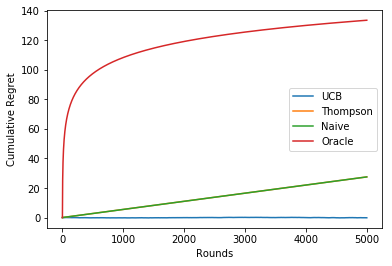

In [138]:
"""Display regret curves"""

plt.figure(1)
x = np.arange(1, T+1)
c = problem_complexity(MAB)
oracle = [c*np.log(t) for t in x]
plt.plot(x, reg1.cumsum(), label='UCB')
plt.plot(x, reg2.cumsum(), label='Thompson')
plt.plot(x, reg3.cumsum(), label='Naive')
plt.plot(x, oracle, label='Oracle')
plt.legend()
plt.xlabel('Rounds')
plt.ylabel('Cumulative Regret')
plt.show()

#### Question 1:

### 1.1 Bernoulli bandit models